In [5]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skincolors import IndividualTypologyAngle

In [6]:
db = "HAM"
root = f"../../dataset/IEEE/{db}/"
test_df = pd.read_csv(f"{root}exp/test_df.csv")

Baseline File Path: ../../dataset/IEEE/HAM/data/ISIC_0030424.jpg
Mean ITA: 87.87743159738498


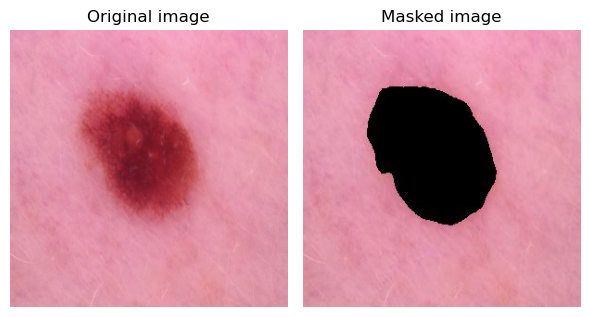

In [11]:
baseline = test_df.sample(n=1, random_state=42)
baseline_filepath = baseline["filepath"].values[0]
original_image = cv2.imread(baseline_filepath)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

baseline_masked_filepath = baseline_filepath.replace("data/", "mask/")
masked_image = cv2.imread(baseline_masked_filepath)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

ita = IndividualTypologyAngle(baseline_masked_filepath)
baseline_mean_ita = ita.get_mean_ita()
baseline_nuance_ita = ita.get_nuance_ita()

print(f"Baseline File Path: {baseline_filepath}")
print(f"Mean ITA: {baseline_mean_ita}")

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original image")
axes[1].imshow(masked_image)
axes[1].axis("off")
axes[1].set_title("Masked image")

plt.tight_layout()
plt.show()

Baseline File Path: ../../dataset/IEEE/HAM/data/ISIC_0033288.jpg
Mean ITA: 91.00869988720385


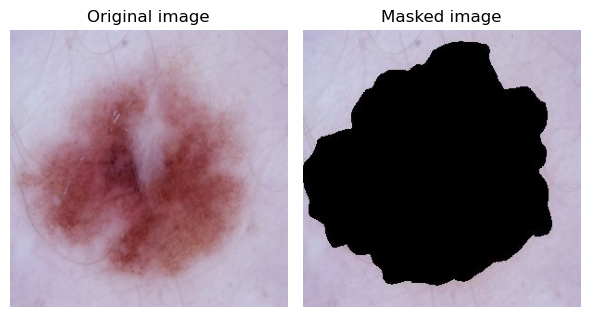

In [16]:
sample = test_df.sample(n=1, random_state=92)
sample_filepath = sample["filepath"].values[0]
original_image = cv2.imread(sample_filepath)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

sample_masked_filepath = sample_filepath.replace("data/", "mask/")
masked_image = cv2.imread(sample_masked_filepath)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

ita = IndividualTypologyAngle(sample_masked_filepath)
sample_mean_ita = ita.get_mean_ita()
sample_nuance_ita = ita.get_nuance_ita()

print(f"Baseline File Path: {sample_filepath}")
print(f"Mean ITA: {sample_mean_ita}")

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original image")
axes[1].imshow(masked_image)
axes[1].axis("off")
axes[1].set_title("Masked image")

plt.tight_layout()
plt.show()

In [17]:
baseline_nuance_ita_series = pd.Series(baseline_nuance_ita)
sample_nuance_ita_series = pd.Series(sample_nuance_ita)
max_length = max(len(baseline_nuance_ita_series), len(sample_nuance_ita_series))
baseline_nuance_ita_series = baseline_nuance_ita_series.reindex(range(max_length))
sample_nuance_ita_series = sample_nuance_ita_series.reindex(range(max_length))

df_plot = pd.DataFrame({
    "baseline": baseline_nuance_ita_series,
    "sample": sample_nuance_ita_series
})

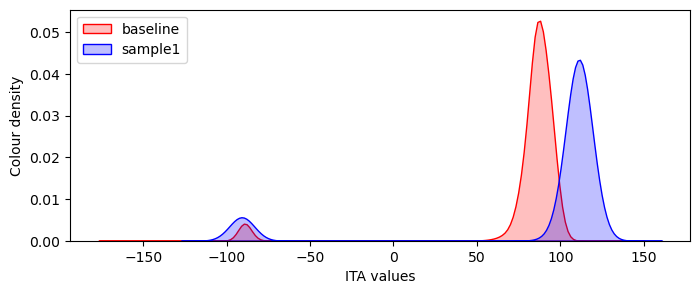

In [26]:
plt.figure(figsize=(8, 3))
sns.kdeplot(df_plot["baseline"], fill=True, color="r", label="baseline")
sns.kdeplot(df_plot["sample"], fill=True, color="b", label="sample1")
plt.xlabel("ITA values")
plt.ylabel("Colour density")
plt.legend(loc="upper left")
plt.show()